In [ ]:
import torch
import time

# Matrix dimensions
M, N, K = 512, 512, 512  # You can vary this to test performance

# Generate two random matrices A and B
A = torch.randn(M, K)
B = torch.randn(K, N)

# Move copies to CPU and GPU
A_cpu = A.clone()
B_cpu = B.clone()

if torch.cuda.is_available():
    A_gpu = A.clone().to("cuda")
    B_gpu = B.clone().to("cuda")
else:
    print("GPU not available. Running only on CPU.")
    A_gpu = B_gpu = None

# Matrix multiplication on CPU
start_cpu = time.time()
C_cpu = torch.matmul(A_cpu, B_cpu)
end_cpu = time.time()

print("====== CPU Execution ======")
print("Matrix A:\n", A_cpu)
print("Matrix B:\n", B_cpu)
print("Output Matrix C:\n", C_cpu)
print(f"Device: CPU")
print(f"Time taken: {end_cpu - start_cpu:.6f} seconds\n")

# Matrix multiplication on GPU
if A_gpu is not None and B_gpu is not None:
    torch.cuda.synchronize()  # Ensure previous GPU tasks are done
    start_gpu = time.time()
    C_gpu = torch.matmul(A_gpu, B_gpu)
    torch.cuda.synchronize()
    end_gpu = time.time()

    print("====== GPU Execution ======")
    print("Matrix A:\n", A_gpu)
    print("Matrix B:\n", B_gpu)
    print("Output Matrix C:\n", C_gpu)
    print(f"Device: GPU")
    print(f"Time taken: {end_gpu - start_gpu:.6f} seconds\n")

====== CPU Execution ======
Matrix A:
 tensor([[ 1.1267,  0.0139,  0.7430,  ..., -1.4289,  0.4836, -1.5660],
        [ 1.6293, -0.0846, -0.2071,  ...,  0.6490, -0.2692, -0.9889],
        [-1.8506, -0.7536,  0.1006,  ...,  0.6770, -0.5363, -1.2759],
        ...,
        [ 0.2463, -1.9761, -0.5152,  ...,  1.2492,  0.1913, -1.2888],
        [-0.5402,  0.1829, -1.3827,  ..., -0.3941, -1.4164,  1.7196],
        [ 0.9008,  0.9771, -2.2136,  ...,  0.2337, -3.0632,  0.6701]])
Matrix B:
 tensor([[ 1.6977,  0.6676, -0.5474,  ...,  0.6896,  0.9354, -0.2977],
        [-2.1775,  1.3999, -1.3161,  ...,  1.2555, -0.4054,  0.9130],
        [ 0.0847,  1.0617, -0.2639,  ...,  1.7064,  1.8250,  0.6960],
        ...,
        [ 1.1076, -0.3787,  0.2354,  ..., -0.2821, -0.2542,  0.0102],
        [ 1.8939, -3.3044, -0.1799,  ..., -1.1556, -0.1654,  0.6378],
        [-0.0576, -0.5888, -1.8728,  ...,  1.4530, -0.0620, -1.1361]])
Output Matrix C:
 tensor([[ 34.8148,  29.7641, -18.9346,  ...,   6.9675, -26.7234,

In [ ]:
import torch

def strassen(A, B):
    # Base case: 2x2 matrix multiplication
    if A.size(0) == 2 and A.size(1) == 2:
        return torch.mm(A, B)
    else:
        # Split matrices into four submatrices
        mid = A.size(0) // 2
        A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
        B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]

        # Compute intermediate matrices
        M1 = strassen(A11 + A22, B11 + B22)
        M2 = strassen(A21 + A22, B11)
        M3 = strassen(A11, B12 - B22)
        M4 = strassen(A22, B21 - B11)
        M5 = strassen(A11 + A12, B22)
        M6 = strassen(A21 - A11, B11 + B12)
        M7 = strassen(A12 - A22, B21 + B22)

        # Combine results
        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6

        # Combine the quadrants into the result
        C = torch.zeros(A.size(0), B.size(1))
        C[:mid, :mid] = C11
        C[:mid, mid:] = C12
        C[mid:, :mid] = C21
        C[mid:, mid:] = C22
        return C

# Test with random matrices
A = torch.randn(4, 4)
B = torch.randn(4, 4)

C = strassen(A, B)
print(C)


tensor([[ 0.9145,  2.3310,  2.8839, -2.0335],
        [-0.9097, -1.8069, -1.3648, -0.1259],
        [-1.0132, -2.5120, -2.6086,  1.3804],
        [-1.6989, -3.4677, -3.3157, -1.0257]])


In [ ]:
import torch

# Check for CUDA availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA device available: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CUDA device not available. Running on CPU.")

# Matrix dimensions
M, K, N = 1024, 1024, 1024

# Generate random matrices on GPU
A = torch.randn(M, K, device=device)
B = torch.randn(K, N, device=device)

# Matrix multiplication using GPU
C = torch.matmul(A, B)

print("Matrix multiplication on GPU completed!")


CUDA device available: Tesla T4
Matrix multiplication on GPU completed!


In [ ]:
import numpy as np
from PIL import Image
import torchvision.transforms as T
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load your image
image = Image.open("image .png")

# Convert image to RGB (if it's RGBA or has alpha channel)
image = image.convert("RGB")

# Define the necessary transforms (resize, to tensor, normalization)
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformation to the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Assuming `model` is a pre-trained model
model.eval()  # Set the model to evaluation mode

# Run inference
with torch.no_grad():
    predictions = model(image_tensor)

print("Predictions:", predictions)

threshold = 0.5
filtered_predictions = []

# Filter predictions based on the score threshold
for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
    if score >= threshold:
        filtered_predictions.append((box, label, score))

# Convert the image back to numpy array if needed
image_np = np.array(image)

# Create a plot
fig, ax = plt.subplots(1)
ax.imshow(image_np)

# Draw the bounding boxes for filtered predictions
for box, label, score in filtered_predictions:
    xmin, ymin, xmax, ymax = box
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin, ymin, f"Class {label.item()} ({score:.2f})", color='red', fontsize=12)

plt.show()


NameError: name 'model' is not defined

Predictions: [{'boxes': tensor([[266.9459,   4.8788, 356.0491, 266.2581],
        [282.9368,  16.8467, 466.4810, 284.6648],
        [280.4735, 143.3118, 343.7899, 263.3802],
        ...,
        [321.4816, 157.2835, 382.4020, 271.9437],
        [  0.0000,  38.5729,  43.8415,  89.9409],
        [259.5340,  42.6229, 292.0618, 174.6128]]), 'scores': tensor([0.7761, 0.1229, 0.1219, 0.1046, 0.0938, 0.0913, 0.0891, 0.0805, 0.0761,
        0.0733, 0.0720, 0.0717, 0.0715, 0.0688, 0.0674, 0.0648, 0.0646, 0.0640,
        0.0616, 0.0611, 0.0607, 0.0603, 0.0599, 0.0594, 0.0594, 0.0592, 0.0586,
        0.0582, 0.0579, 0.0579, 0.0570, 0.0563, 0.0563, 0.0559, 0.0558, 0.0549,
        0.0547, 0.0546, 0.0540, 0.0533, 0.0525, 0.0508, 0.0504, 0.0504, 0.0502,
        0.0502, 0.0498, 0.0496, 0.0495, 0.0493, 0.0482, 0.0480, 0.0473, 0.0472,
        0.0471, 0.0470, 0.0469, 0.0456, 0.0449, 0.0448, 0.0446, 0.0446, 0.0446,
        0.0443, 0.0443, 0.0439, 0.0436, 0.0431, 0.0429, 0.0426, 0.0422, 0.0421,
        0.0

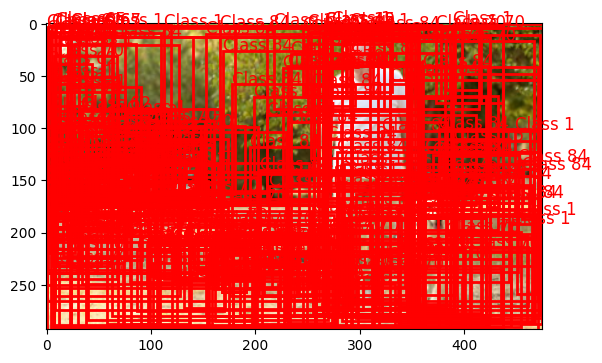

In [ ]:
import numpy as np
from PIL import Image
import torchvision.transforms as T
import torch

# Load your image
image = Image.open("image.png")

# Convert image to RGB (if it's RGBA or has alpha channel)
image = image.convert("RGB")

# Define the necessary transforms (resize, to tensor, normalization)
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformation to the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Assuming model is a pre-trained model
model.eval()  # Set the model to evaluation mode

# Run inference
with torch.no_grad():
    predictions = model(image_tensor)

print("Predictions:", predictions)

threshold = 0.5
filtered_predictions = []
for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
    if score >= threshold:
        filtered_predictions.append((box, label, score))
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Convert the image back to numpy array if needed
image_np = np.array(image)

# Create a plot
fig, ax = plt.subplots(1)
ax.imshow(image_np)

# Draw the bounding boxes
for box, label in zip(predictions[0]['boxes'], predictions[0]['labels']):
    xmin, ymin, xmax, ymax = box
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin, ymin, f"Class {label.item()}", color='red', fontsize=12)

plt.show()

Total objects detected: 1
Inference time: 0.1083 seconds per image

Detailed Predictions:
Object 1:
  - Label: 84 (Confidence: 0.7761)
  - Bounding Box: [266.94586    4.878788 356.04907  266.2581  ]


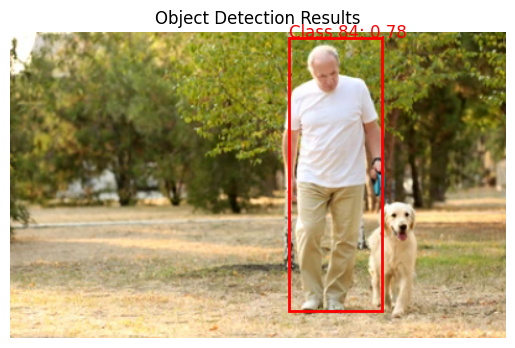

In [ ]:
import time
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load pre-trained SSD model
model = models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

# Image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Load image
image_path = "image.png"
image = Image.open(image_path)

# Convert image to RGB if it's RGBA
if image.mode != 'RGB':
    image = image.convert('RGB')

# Apply transformations
image_tensor = transform(image).unsqueeze(0)

# Time inference
start_time = time.time()
with torch.no_grad():
    predictions = model(image_tensor)
end_time = time.time()

# Inference time calculation
inference_time = end_time - start_time

# Extracting predictions
boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

# Filter out predictions with low confidence (e.g., below 0.5)
confidence_threshold = 0.5
high_conf_preds = [(box, label, score) for box, label, score in zip(boxes, labels, scores) if score >= confidence_threshold]

# Print detailed predictions
print(f"Total objects detected: {len(high_conf_preds)}")
print(f"Inference time: {inference_time:.4f} seconds per image")

# If there are any high confidence detections
if high_conf_preds:
    print("\nDetailed Predictions:")
    for i, (box, label, score) in enumerate(high_conf_preds):
        print(f"Object {i+1}:")
        print(f"  - Label: {label} (Confidence: {score:.4f})")
        print(f"  - Bounding Box: {box}")
else:
    print("\nNo objects detected with high confidence.")

# Visualize the results
fig, ax = plt.subplots(1)
ax.imshow(np.array(image))

# Draw bounding boxes for high confidence detections
for box, label, score in high_conf_preds:
    xmin, ymin, xmax, ymax = box
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin, ymin, f"Class {label}: {score:.2f}", color='red', fontsize=12)

plt.title("Object Detection Results")
plt.axis('off')  # Hide axis
plt.show()
